<a href="https://colab.research.google.com/github/JuanDanielEspinoza/termography/blob/main/Segmentation/models/Yolo_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 43.1/112.6 GB disk)


In [ ]:
#@title Select YOLO11 🚀 logger {run: 'auto'}
logger = 'TensorBoard' #@param ['TensorBoard', 'Weights & Biases']

if logger == 'TensorBoard':
  !yolo settings tensorboard=True
  %load_ext tensorboard
  %tensorboard --logdir .
elif logger == 'Weights & Biases':
  !yolo settings wandb=True

In [ ]:
import yaml

data = {
    'path': '/content/drive/MyDrive/segmentation',
    'train': 'train/images',
    'val': 'val/images',
    'test': 'test/images',
    'names': {
        0: 'patient'
    }
}

with open('/content/drive/MyDrive/segmentation/data.yaml', 'w') as file:
    yaml.dump(data, file,
              default_flow_style=False,
              sort_keys=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Train YOLO11n on COCO8 for 3 epochs
!yolo train model=yolo11n-seg.pt data=/content/drive/MyDrive/segmentation/data.yaml epochs=500 imgsz=320 patience= 50

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/segmentation/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=500, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=50, perspective=0.0, plots=True,

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/runs/segment/train2/weights/best.pt')

In [ ]:
preds = model('/content/drive/MyDrive/segmentation/test/images')


image 1/5 /content/drive/MyDrive/segmentation/test/images/0fc94b3d-thermal_IR_0065.jpg: 256x320 2 patients, 52.2ms
image 2/5 /content/drive/MyDrive/segmentation/test/images/42396b09-thermal_IR_0067.jpg: 256x320 2 patients, 10.4ms
image 3/5 /content/drive/MyDrive/segmentation/test/images/c0da243f-thermal_IR_0042.jpg: 256x320 1 patient, 10.4ms
image 4/5 /content/drive/MyDrive/segmentation/test/images/e4b0de3b-thermal_IR_0051.jpg: 256x320 1 patient, 12.8ms
image 5/5 /content/drive/MyDrive/segmentation/test/images/eed5bde6-thermal_IR_0032.jpg: 256x320 1 patient, 10.3ms
Speed: 1.0ms preprocess, 19.2ms inference, 37.9ms postprocess per image at shape (1, 3, 256, 320)


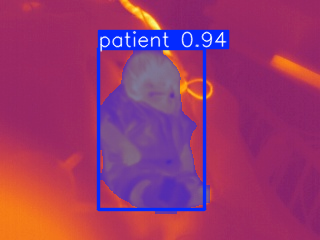

In [ ]:
preds[4].show()

# 4. Export

Export a YOLO model to any supported format below with the `format` argument, i.e. `format=onnx`. See [Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://docs.ultralytics.com/integrations/onnx/) or [OpenVINO](https://docs.ultralytics.com/integrations/openvino/) for up to 3x CPU speedup.
- 💡 ProTip: Export to [TensorRT](https://docs.ultralytics.com/integrations/tensorrt/) for up to 5x GPU speedup.

| Format | `format` Argument | Model | Metadata | Arguments |
|--------|-----------------|-------|----------|------------|
| [PyTorch](https://pytorch.org/) | - | `yolo11n.pt` | ✅ | - |
| [TorchScript](https://docs.ultralytics.com/integrations/torchscript) | `torchscript` | `yolo11n.torchscript` | ✅ | `imgsz`, `batch`, `optimize`, `half`, `nms`, `device` |
| [ONNX](https://docs.ultralytics.com/integrations/onnx) | `onnx` | `yolo11n.onnx` | ✅ | `imgsz`, `batch`, `dynamic`, `half`, `opset`, `simplify`, `nms`, `device` |
| [OpenVINO](https://docs.ultralytics.com/integrations/openvino) | `openvino` | `yolo11n_openvino_model/` | ✅ | `imgsz`, `batch`, `dynamic`, `half`, `int8`, `nms`, `fraction`, `device`, `data` |
| [TensorRT](https://docs.ultralytics.com/integrations/tensorrt) | `engine` | `yolo11n.engine` | ✅ | `imgsz`, `batch`, `dynamic`, `half`, `int8`, `simplify`, `nms`, `fraction`, `device`, `data`, `workspace` |
| [CoreML](https://docs.ultralytics.com/integrations/coreml) | `coreml` | `yolo11n.mlpackage` | ✅ | `imgsz`, `batch`, `half`, `int8`, `nms`, `device` |
| [TF SavedModel](https://docs.ultralytics.com/integrations/tf-savedmodel) | `saved_model` | `yolo11n_saved_model/` | ✅ | `imgsz`, `batch`, `int8`, `keras`, `nms`, `device` |
| [TF GraphDef](https://docs.ultralytics.com/integrations/tf-graphdef) | `pb` | `yolo11n.pb` | ❌ | `imgsz`, `batch`, `device` |
| [TF Lite](https://docs.ultralytics.com/integrations/tflite) | `tflite` | `yolo11n.tflite` | ✅ | `imgsz`, `batch`, `half`, `int8`, `nms`, `fraction`, `device`, `data` |
| [TF Edge TPU](https://docs.ultralytics.com/integrations/edge-tpu) | `edgetpu` | `yolo11n_edgetpu.tflite` | ✅ | `imgsz`, `device` |
| [TF.js](https://docs.ultralytics.com/integrations/tfjs) | `tfjs` | `yolo11n_web_model/` | ✅ | `imgsz`, `batch`, `half`, `int8`, `nms`, `device` |
| [PaddlePaddle](https://docs.ultralytics.com/integrations/paddlepaddle) | `paddle` | `yolo11n_paddle_model/` | ✅ | `imgsz`, `batch`, `device` |
| [MNN](https://docs.ultralytics.com/integrations/mnn) | `mnn` | `yolo11n.mnn` | ✅ | `imgsz`, `batch`, `half`, `int8`, `device` |
| [NCNN](https://docs.ultralytics.com/integrations/ncnn) | `ncnn` | `yolo11n_ncnn_model/` | ✅ | `imgsz`, `batch`, `half`, `device` |
| [IMX500](https://docs.ultralytics.com/integrations/sony-imx500) | `imx` | `yolo11n_imx_model/` | ✅ | `imgsz`, `int8`, `fraction`, `device`, `data` |
| [RKNN](https://docs.ultralytics.com/integrations/rockchip-rknn) | `rknn` | `yolo11n_rknn_model/` | ✅ | `imgsz`, `batch`, `name`, `device` |

In [ ]:
!yolo export model=yolo11n.pt format=torchscript

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

TorchScript: starting export with torch 2.6.0+cu124...
TorchScript: export success ✅ 2.4s, saved as 'yolo11n.torchscript' (10.5 MB)

Export complete (4.1s)
Results saved to /content
Predict:         yolo predict task=detect model=yolo11n.torchscript imgsz=640  
Validate:        yolo val task=detect model=yolo11n.torchscript imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app
💡 Learn more at https://docs.ultralytics.com/modes/export
